**Aryan Zende**<h1 style='text-align:center;'>CODSOFT</h1>
<h3 style='text-align:center;'>DATA SCIENCE</h3>
<h4 style='text-align:center;'>Movie Rating Prediction using Regression Techniques</h4>
<p style='text-align:center;'>Analyze historical movie data to predict IMDb ratings based on features like genre, director, actors, and more.</p>


In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = r"C:\Users\hp\Desktop\Aryan POWER BI\IMDb Movies India.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
print(df.shape)

(15509, 10)


In [5]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [6]:
print(df.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

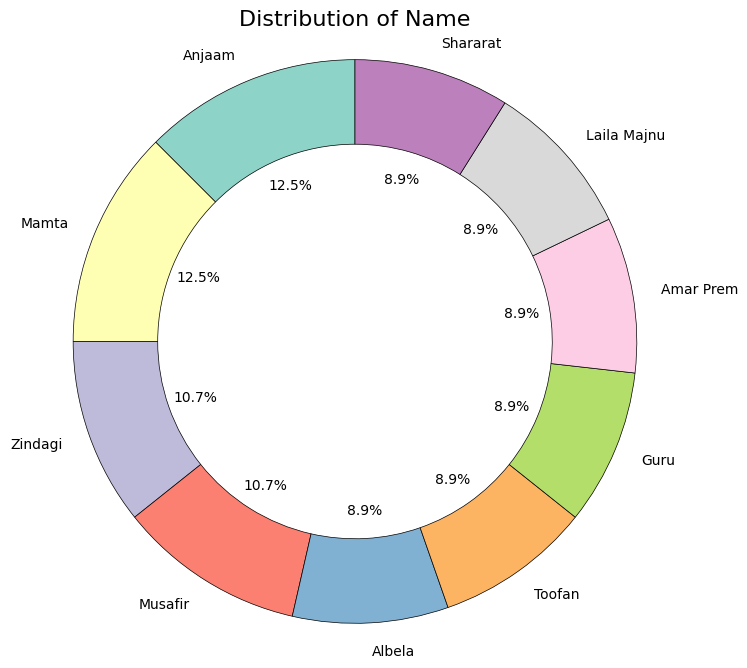

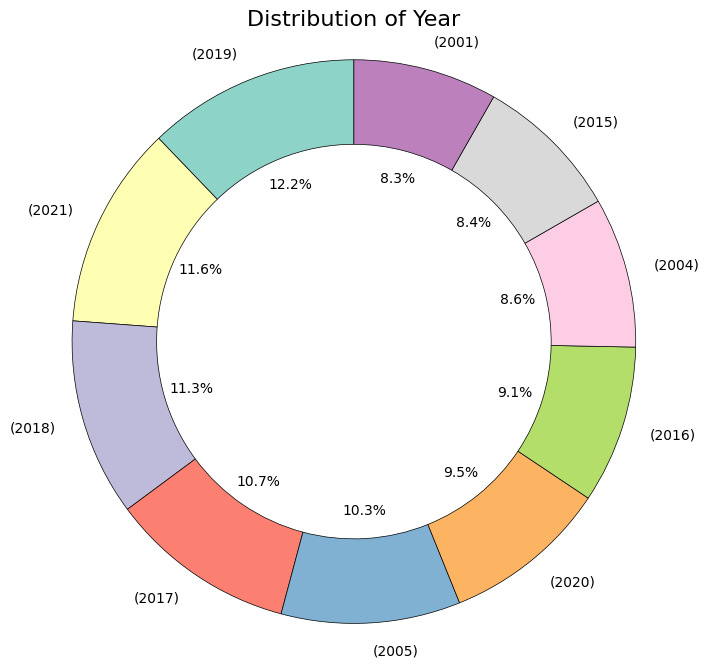

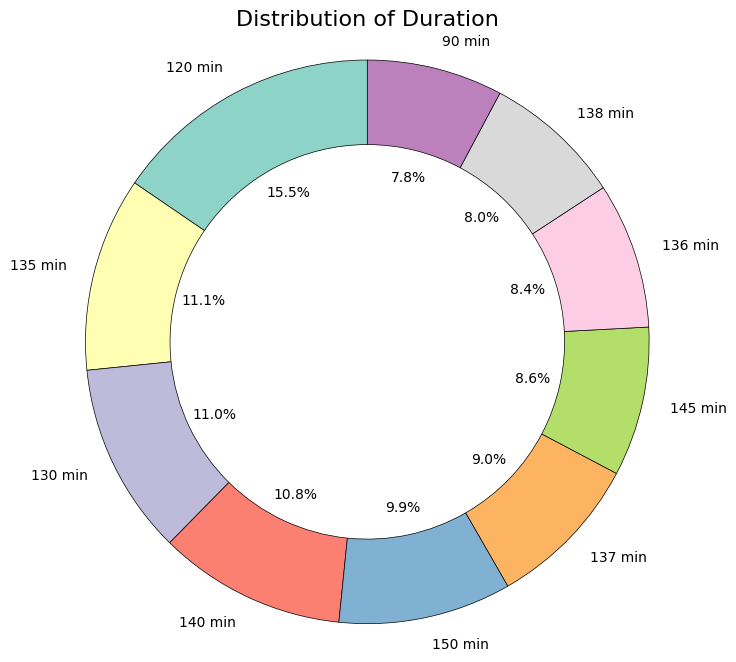

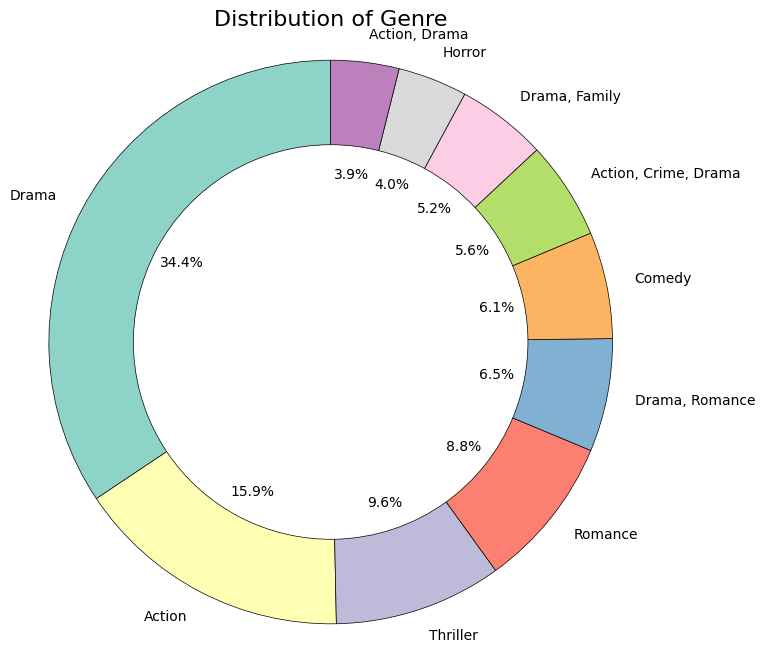

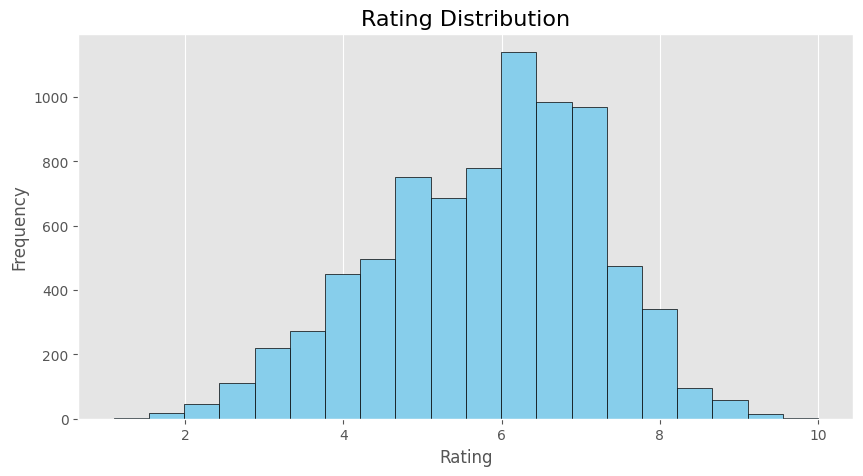

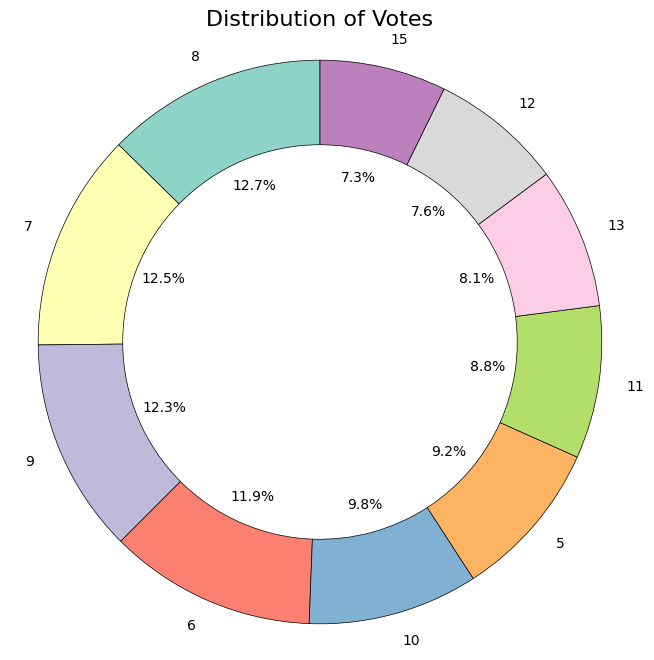

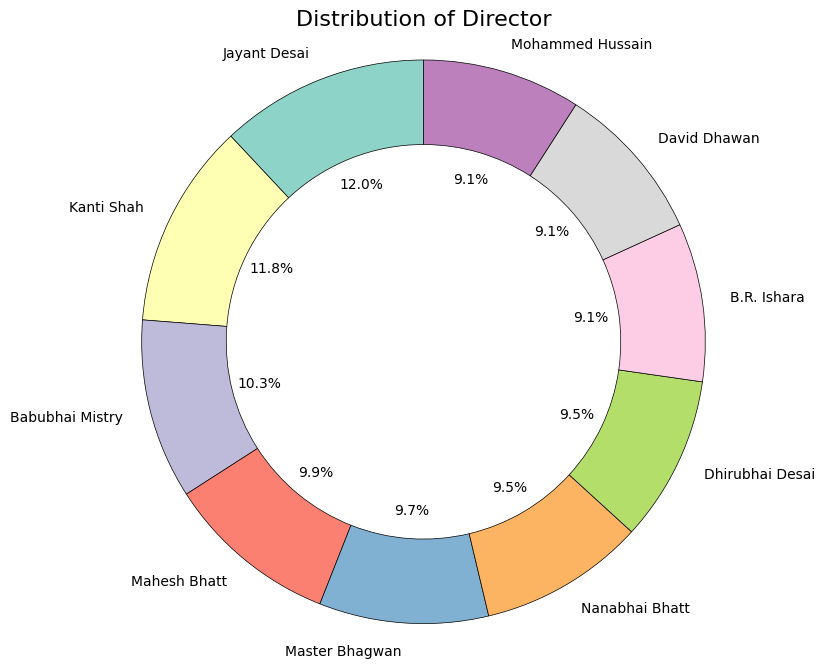

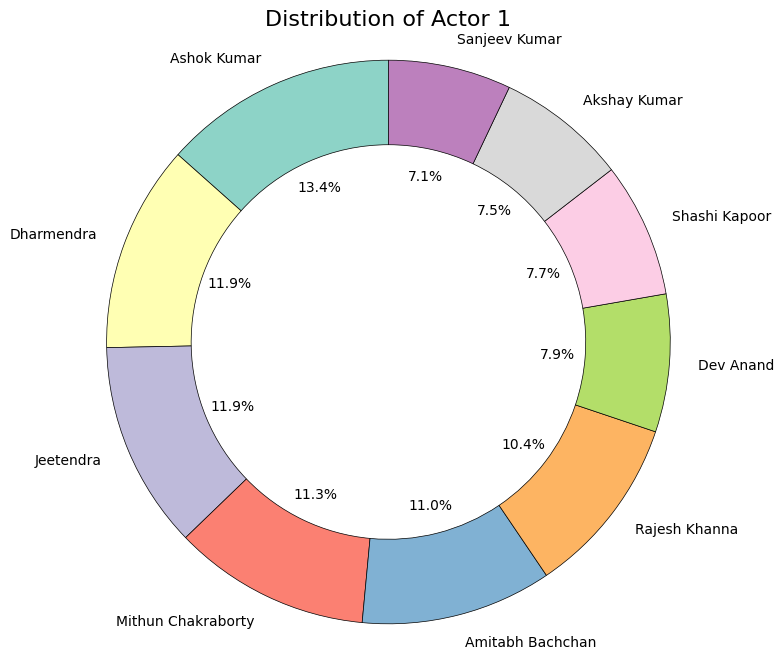

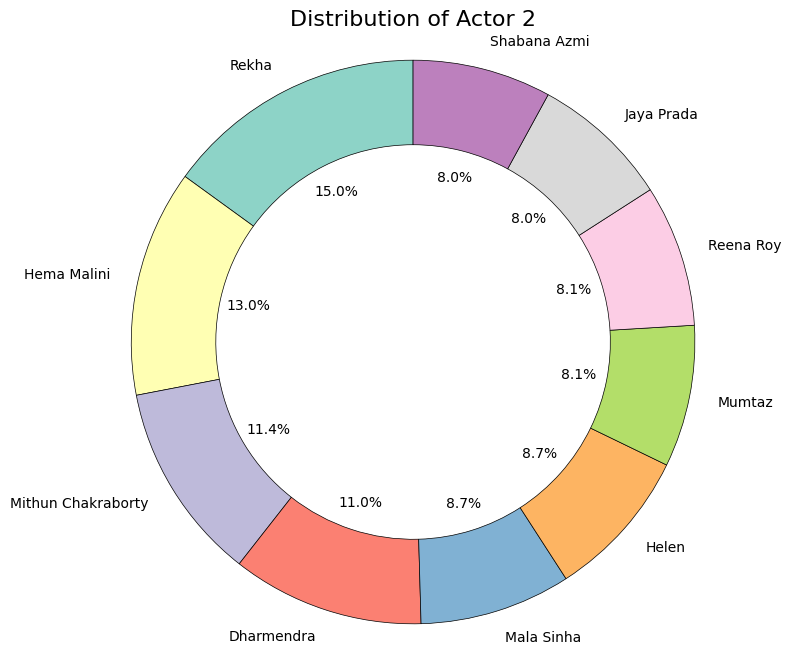

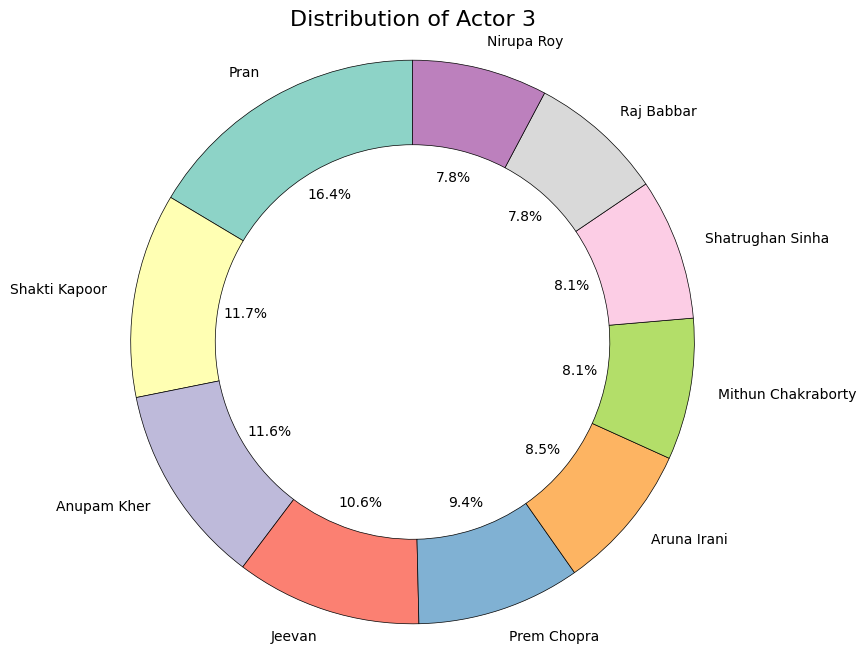

In [11]:

# Function to plot pie chart with customized colors
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    df[column].value_counts().head(10).plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3", n_colors=10),  # Change color palette
        wedgeprops=dict(width=0.3, edgecolor='black')  # Add edge color for slices
    )
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.ylabel('')
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
    plt.show()

# Function to plot histogram with customized colors
def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    df[column].hist(color='skyblue', edgecolor='black', bins=20)  # Change color and add edge color
    plt.title(f'{column} Distribution', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')  # Add grid for better visibility
    plt.show()

# Plotting for each column with customization
for col in df.columns:
    if df[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)


In [12]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [13]:
# Remove '(' and ')' from the 'Year' column
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

# Convert the 'Year' column to numeric, forcing errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Fill NaN values with the median year (or use 0 if preferred)
df['Year'].fillna(df['Year'].median(), inplace=True)

# Convert 'Year' to integers
df['Year'] = df['Year'].astype(int)


In [14]:
# Remove '(' and ')' from the 'Votes' column
df['Votes'] = df['Votes'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

# Convert the 'Votes' column to numeric, forcing errors to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Fill NaN values with the median (or use 0 if preferred)
df['Votes'].fillna(df['Votes'].median(), inplace=True)

# Convert 'Votes' to integers
df['Votes'] = df['Votes'].astype(int)


In [15]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,NaN,Drama,NaN,35,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,35,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
# Clean and convert 'Duration'
df['Duration'] = df['Duration'].str.split(' ', expand=True)[0]  # Get the first part before space
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')  # Convert to numeric, coerce errors to NaN


df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [17]:
director_avg_rating = {}
for index, row in df.iterrows():
    director = row['Director']
    rating = row['Rating']
    if director in director_avg_rating:
        director_avg_rating[director]['sum'] += rating
        director_avg_rating[director]['count'] += 1
    else:
        director_avg_rating[director] = {'sum': rating, 'count': 1}

df['Director Average Rating'] = df['Director'].apply(lambda x: director_avg_rating[x]['sum'] / director_avg_rating[x]['count'])

In [18]:
df['Genre1'] = df.Genre.str.split(',',expand=True)[0]
df['Genre2'] = df.Genre.str.split(',',expand=True)[1]
df['Genre3'] = df.Genre.str.split(',',expand=True)[2]

In [19]:
df = df.drop(columns=['Genre','Director','Actor 1','Actor 2','Actor 3'])

In [20]:
df.shape[0]


15509

In [21]:
print(df.shape)
print(df.isna().sum())
df = df.fillna(0)

for i in df.index:
    if df.at[i, 'Genre2'] == 0:
        df.at[i, 'Genre2'] = df.at[i, 'Genre1']
    elif df.at[i, 'Genre3'] == 0:
        df.at[i, 'Genre3'] = df.at[i, 'Genre2']
print(df.isna().sum())

(15509, 9)
Name                           0
Year                           0
Duration                       0
Rating                      7590
Votes                          0
Director Average Rating    11523
Genre1                      1877
Genre2                      9308
Genre3                     12269
dtype: int64
Name                       0
Year                       0
Duration                   0
Rating                     0
Votes                      0
Director Average Rating    0
Genre1                     0
Genre2                     0
Genre3                     0
dtype: int64


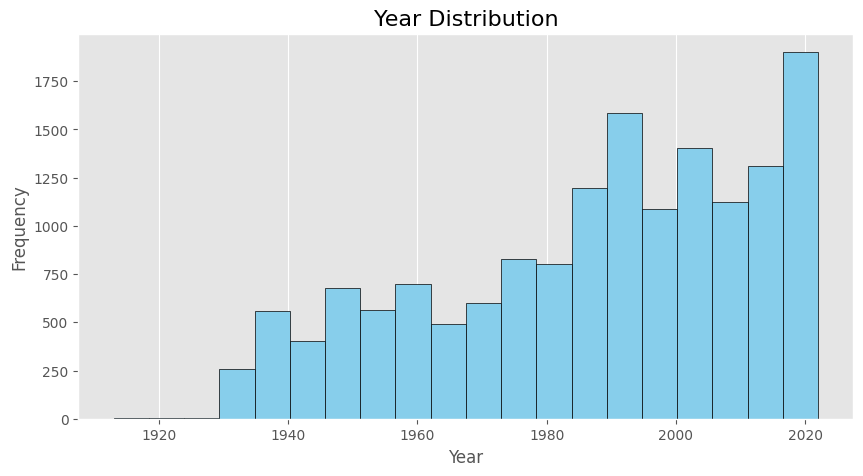

In [22]:
plt.figure(figsize=(10, 5))
df['Year'].hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Year Distribution', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

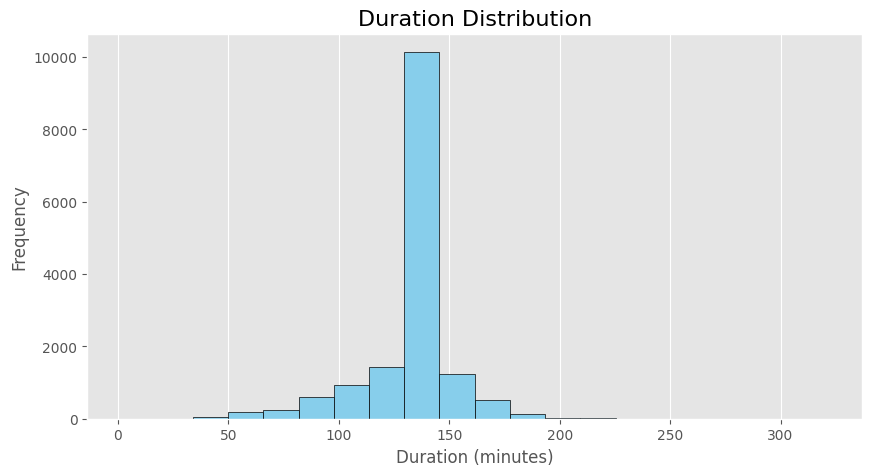

In [23]:
plt.figure(figsize=(10, 5))
df['Duration'].hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Duration Distribution', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

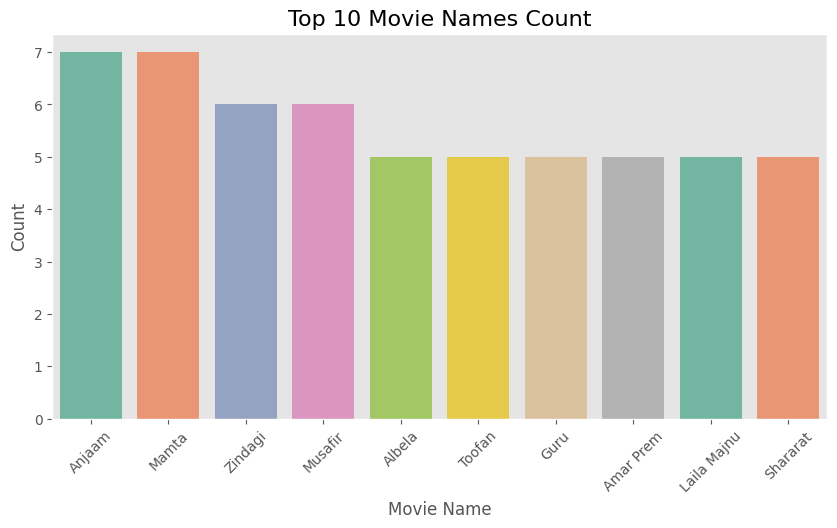

In [24]:
# Bar charts for categorical columns
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Name', order=df['Name'].value_counts().index[:10], palette="Set2")
plt.title('Top 10 Movie Names Count', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Movie Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

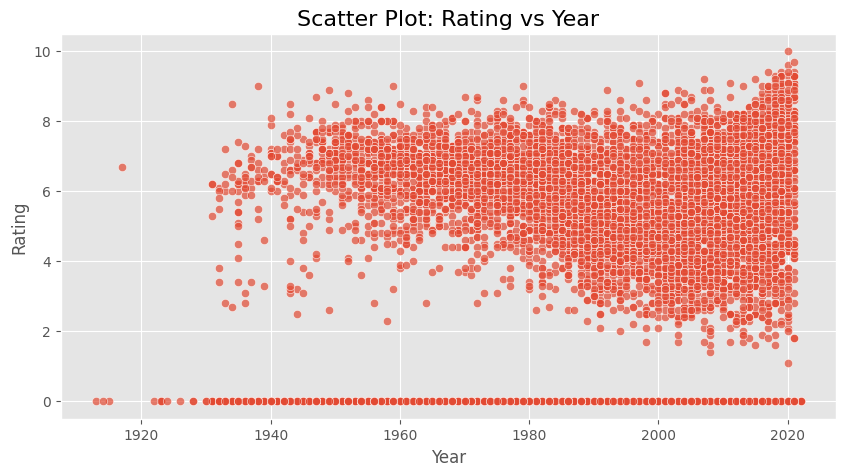

In [25]:
# Scatter plots for relationships between numerical columns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Year', y='Rating', alpha=0.7)
plt.title('Scatter Plot: Rating vs Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)
plt.show()

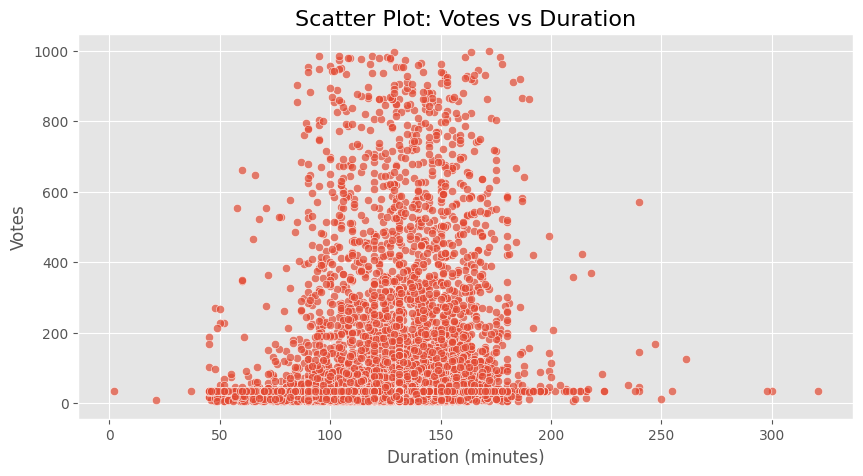

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Duration', y='Votes', alpha=0.7)
plt.title('Scatter Plot: Votes vs Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.grid(True)
plt.show()

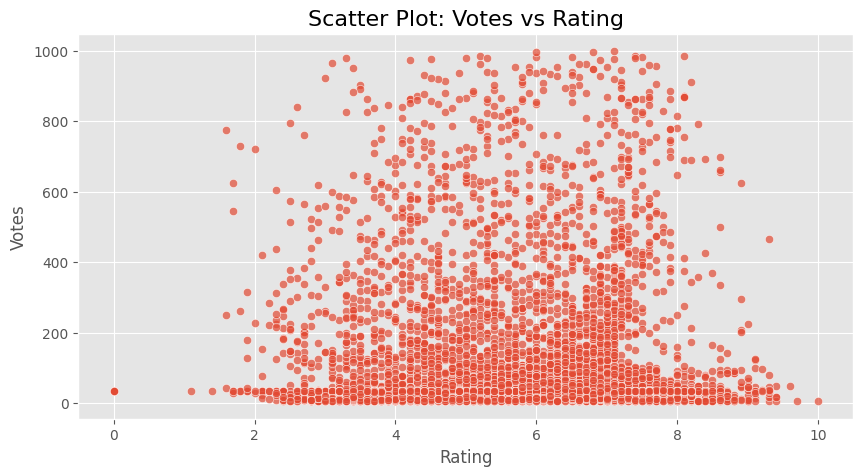

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Rating', y='Votes', alpha=0.7)
plt.title('Scatter Plot: Votes vs Rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Votes', fontsize=12)
plt.grid(True)
plt.show()

In [28]:
df.head()

,Name,Year,Duration,Rating,Votes,Director Average Rating,Genre1,Genre2,Genre3
0,,1991,131.0,0.0,35,0.0,Drama,Drama,0
1,#Gadhvi (He thought he was Gandhi),2019,109.0,7.0,8,7.0,Drama,Drama,0
2,#Homecoming,2021,90.0,0.0,35,0.0,Drama,Musical,Musical
3,#Yaaram,2019,110.0,4.4,35,4.4,Comedy,Romance,Romance
4,...And Once Again,2010,105.0,0.0,35,0.0,Drama,Drama,0


In [29]:
# Fill missing Rating values with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Replace '0' in Genre3 with 'None'
df['Genre3'] = df['Genre3'].replace('0', 'None')

# Convert Genre3 column to string
df['Genre3'] = df['Genre3'].astype(str)
# Replace '0' in Genre3 with 'None'
df['Genre1'] = df['Genre1'].replace('0', 'None')

# Convert Genre3 column to string
df['Genre1'] = df['Genre1'].astype(str)
# Replace '0' in Genre3 with 'None'
df['Genre2'] = df['Genre2'].replace('0', 'None')

# Convert Genre3 column to string
df['Genre2'] = df['Genre2'].astype(str)

In [30]:
df.head()

,Name,Year,Duration,Rating,Votes,Director Average Rating,Genre1,Genre2,Genre3
0,,1991,131.0,0.0,35,0.0,Drama,Drama,0
1,#Gadhvi (He thought he was Gandhi),2019,109.0,7.0,8,7.0,Drama,Drama,0
2,#Homecoming,2021,90.0,0.0,35,0.0,Drama,Musical,Musical
3,#Yaaram,2019,110.0,4.4,35,4.4,Comedy,Romance,Romance
4,...And Once Again,2010,105.0,0.0,35,0.0,Drama,Drama,0


In [31]:
df['Genre1'].unique()

array(['Drama', 'Comedy', 'Documentary', 'Horror', 'Action', 'Thriller',
       '0', 'Crime', 'Biography', 'Adventure', 'War', 'Sport', 'Mystery',
       'Musical', 'Romance', 'Family', 'Fantasy', 'Sci-Fi', 'Animation',
       'Music', 'History', 'Reality-TV'], dtype=object)

In [32]:
le = LabelEncoder()

# Encode each genre column
df['Genre1'] = le.fit_transform(df['Genre1'])
df['Genre2'] = le.fit_transform(df['Genre2'])
df['Genre3'] = le.fit_transform(df['Genre3'].fillna('None'))  # Handle None values

In [33]:
df.columns

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes',
       'Director Average Rating', 'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [35]:
dct = {
    'Linear':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR()
}

In [36]:
dct.items()

dict_items([('Linear', LinearRegression()), ('DecisionTree', DecisionTreeRegressor()), ('RandomForest', RandomForestRegressor()), ('GradientBoosting', GradientBoostingRegressor()), ('KNN', KNeighborsRegressor()), ('SVR', SVR())])

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [38]:
X = df.drop(columns=['Name', 'Rating'], axis=1)
y = df['Rating']

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=21)

In [40]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
train_cv = []

for name,model in dct.items():
    # fit the model
    m = model.fit(xtrain,ytrain)
    ypred_train = m.predict(xtrain)
    ypred_test = m.predict(xtest)
    # calculate MSE
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    # caluclate R2
    r2_train = (r2_score(ytrain,ypred_train))*100
    r2_test = (r2_score(ytest,ypred_test))*100
    # calculate cross validated scores
    cv = cross_val_score(m,xtrain,ytrain,cv=5,scoring='r2')
    scores = (cv.mean())*100

    # add these values to the respective list to compare the output
    train_mse.append(mse_train)
    train_r2.append(r2_train)
    test_mse.append(mse_test)
    test_r2.append(r2_test)
    train_cv.append(scores)

    # print the results
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print(f'CV:{train_cv}')
    print("===============================")

Scores for Linear
Training Scores
MSE:[5.231392226194383]
R2:[45.17784940163079]
Testing Scores
MSE:[5.296052209920232]
R2:[43.54286256709157]
CV:[45.10207533032098]
Scores for DecisionTree
Training Scores
MSE:[5.231392226194383, 0.018514670018410024]
R2:[45.17784940163079, 99.80597630914653]
Testing Scores
MSE:[5.296052209920232, 1.7697772806618493]
R2:[43.54286256709157, 81.13376620932709]
CV:[45.10207533032098, 81.40631207893765]
Scores for RandomForest
Training Scores
MSE:[5.231392226194383, 0.018514670018410024, 0.15135874922930367]
R2:[45.17784940163079, 99.80597630914653, 98.41384247522461]
Testing Scores
MSE:[5.296052209920232, 1.7697772806618493, 0.9103667518957095]
R2:[43.54286256709157, 81.13376620932709, 90.29528056202818]
CV:[45.10207533032098, 81.40631207893765, 89.35311357890102]
Scores for GradientBoosting
Training Scores
MSE:[5.231392226194383, 0.018514670018410024, 0.15135874922930367, 1.119088795555064]
R2:[45.17784940163079, 99.80597630914653, 98.41384247522461, 88.

In [41]:
''' Step 4: Data Preparation for Modeling
X = df.drop(columns=['Name', 'Rating'], axis=1)
y = df['Rating']'''


" Step 4: Data Preparation for Modeling\nX = df.drop(columns=['Name', 'Rating'], axis=1)\ny = df['Rating']"

In [43]:
df_res = pd.DataFrame(res)
df_res.sort_values('CV Training Scores',ascending=False)


,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores,CV Training Scores
2,RandomForest,0.151359,0.910367,98.413842,90.295281,89.353114
3,GradientBoosting,1.119089,1.104248,88.272557,88.228462,87.386928
1,DecisionTree,0.018515,1.769777,99.805976,81.133766,81.406312
4,KNN,1.281429,1.993573,86.571323,78.748054,78.594392
0,Linear,5.231392,5.296052,45.177849,43.542863,45.102075
5,SVR,10.311274,10.471315,-8.056555,-11.626637,-13.978603


In [44]:
params = {'n_estimators':[200,300],
          'max_depth':[5,6,7,8],
          'min_samples_split':[2,3,4,5,6],
          'criterion':['squared_error','absolute_error']}

In [45]:
rfr = RandomForestRegressor()
rscv = RandomizedSearchCV(rfr,params,cv=3,scoring='neg_mean_squared_error')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [200, 300]},
                   scoring='neg_mean_squared_error')

In [47]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [48]:
best_rfr = rscv.best_estimator_
best_rfr

RandomForestRegressor(max_depth=8, min_samples_split=5, n_estimators=200)

In [49]:
from xgboost import XGBRegressor

In [50]:
model = XGBRegressor()
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
res = {'Name':list(dct.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,
       'CV Training Scores':train_cv}

In [51]:
model.score(xtrain,ytrain)

0.9518082753714959

In [52]:
model.score(xtest,ytest)

0.895848466985752

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {'n_estimators':[200,300,500,600,800,1000],
          'learning_rate':[0.05,0.1,0.2,0.3],
          'max_depth':[5,6,7,8,9,10],
          'min_child_weight':[1,2,3],
          'objective':['reg:squarederror'],
          'gamma':[0.1,0.2,0.3,0.4]}

In [55]:
gscv = GridSearchCV(model,params,scoring='neg_mean_squared_error',cv=5)
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [200, 300, 500, 600, 800, 1000],
                         'objective': ['reg:squarederror']},
             scoring='neg_mean_squared_error')

In [56]:
gscv.best_params_

{'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 200,
 'objective': 'reg:squarederror'}

In [57]:
best_xgb = gscv.best_estimator_
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
best_xgb.score(xtrain,ytrain)

0.9433200673259827

In [59]:
best_xgb.score(xtest,ytest)

0.9025983144549758

In [60]:
params1 = {'subsample':[0.5,0.6,0.7,0.8,0.9,1],
           'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1]}

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
def eval_model(model,xtrain,ytrain):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the scores
    ypred_test = model.predict(xtest)
    # Calculate MSE,RMSE,MAE,R2 scores
    mse = mean_squared_error(ytest,ypred_test)
    rmse = mse**(1/2)
    mae = mean_absolute_error(ytest,ypred_test)
    r2 = r2_score(ytest,ypred_test)
    return mse,rmse,mae,r2

In [65]:
(MSE,RMSE,MAE,r2) = eval_model(best_rfr,xtrain,ytrain)
print(f'Evaluation Metrics: \nMSE: {MSE}\nRMSE:{RMSE}\nMAE:{MAE}\nR2:{r2}')

Evaluation Metrics: 
MSE: 0.8619273957928708
RMSE:0.928400450125306
MAE:0.45894074364738
R2:0.9081165526459191


In [68]:
ytest.head(10)

874      5.4
3818     0.0
8228     8.4
10778    6.7
12618    0.0
7937     4.3
10594    0.0
5698     0.0
13083    0.0
4841     6.5
Name: Rating, dtype: float64

In [69]:
df_final = xtest
df_final['Predicted_Rating'] = ypred_test
df_final

,Year,Duration,Votes,Director Average Rating,Genre1,Genre2,Genre3,Predicted_Rating
874,1986,160.0,132,5.30000,1,5,5,3.230382
3818,2021,87.0,35,0.00000,8,30,22,0.863689
8228,2007,165.0,35,8.40000,8,6,6,2.499393
10778,1978,150.0,35,6.50000,1,3,3,1.920436
12618,1995,131.0,35,0.00000,8,30,22,0.920099
...,...,...,...,...,...,...,...,...
13781,1982,131.0,18,5.21875,1,5,5,1.461541
14707,1988,131.0,35,0.00000,20,42,22,0.451846
3171,1986,131.0,35,0.00000,7,29,22,0.786330
6049,1991,131.0,35,0.00000,20,42,22,0.505921


In [70]:
df_final.to_csv('Predicted Ratings.csv',index=False)

In [73]:
df_final.head()

,Year,Duration,Votes,Director Average Rating,Genre1,Genre2,Genre3,Predicted_Rating
874,1986,160.0,132,5.3,1,5,5,3.230382
3818,2021,87.0,35,0.0,8,30,22,0.863689
8228,2007,165.0,35,8.4,8,6,6,2.499393
10778,1978,150.0,35,6.5,1,3,3,1.920436
12618,1995,131.0,35,0.0,8,30,22,0.920099
